In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
daf = pd.read_excel('/content/drive/MyDrive/largeProject/processData/BC_CSKH_TD_TH_20230630.xlsx', sheet_name='TD',skiprows=1)
daf.head(20)

,Lũy kế đến ngày 30/06/2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,STT,CHỈ TIÊU,ĐƠN VỊ,ĐIỀU KIỆN,Tháng,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Năm,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,KPI mục tiêu tháng,Tháng 6.2023,Đánh giá,So sánh T5.2023,NaN,So sánh T6.2022,...,Đánh giá,So sánh Q1.2023,NaN,So sánh Q2.2022,NaN,KPI mục tiêu năm,Năm 2023,Đánh giá,So sánh 2022,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T5.2023,Tăng giảm,T6.2022,...,NaN,Q1.2023,Tăng giảm,Q2.2022,Tăng giảm,NaN,NaN,NaN,2022,Tăng giảm
3,I,VTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Tỷ lệ kết nối thành công đến tổng đài,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.1,KHCN_Di động Vip,%,>=,95,95.2,Đạt,97.8,-2.62,97,...,Đạt,97.3,-0.8,97.1,-0.6,95,96.8,Đạt,97,-0.17
6,1.2,KHCN_Di động đại trà,%,>=,90,89.4,Không đạt,93.6,-4.18,93.2,...,Đạt,93.5,-1.84,91.3,0.31,90,92.4,Đạt,91.6,0.79
7,1.3,KHCN_Cố định,%,>=,95,88,Không đạt,95.6,-7.64,99,...,Không đạt,96.9,-4.75,98.9,-6.7,95,94.4,Không đạt,98.6,-4.22
8,1.4,KHDN_SME,%,>=,95,96.3,Đạt,99.3,-3.03,96,...,Đạt,98.3,-1.03,95.3,1.93,95,97.7,Đạt,95.6,2.07
9,2,Tỷ lệ phản ánh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
timeNow = daf.columns[0]
new_header = daf.iloc[0] #grab the first row for the header
daf = daf[1:] #take the data less the header row
daf.columns = new_header #set the header row as the df header

In [7]:
df = daf.iloc[2:].copy().reset_index(drop=True)
df

,STT,CHỈ TIÊU,ĐƠN VỊ,ĐIỀU KIỆN,Tháng,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Năm,NaN,NaN,NaN,NaN
0,I,VTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tỷ lệ kết nối thành công đến tổng đài,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.1,KHCN_Di động Vip,%,>=,95,95.2,Đạt,97.8,-2.62,97,...,Đạt,97.3,-0.8,97.1,-0.6,95,96.8,Đạt,97,-0.17
3,1.2,KHCN_Di động đại trà,%,>=,90,89.4,Không đạt,93.6,-4.18,93.2,...,Đạt,93.5,-1.84,91.3,0.31,90,92.4,Đạt,91.6,0.79
4,1.3,KHCN_Cố định,%,>=,95,88,Không đạt,95.6,-7.64,99,...,Không đạt,96.9,-4.75,98.9,-6.7,95,94.4,Không đạt,98.6,-4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,3,Tỷ lệ gỡ bài thành công dịch vụ chuyển p...,%,>=,82,82.3,Đạt,82.4,-0.17,82,...,Đạt,82.5,-0.16,81,1.35,0,82.3,Đạt,80.6,1.76
81,4,Tỷ lệ xử lý phản ánh của KH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,4.1,Tỷ lệ xử lý thành công tại bàn dịch ...,%,>=,77,77.4,Đạt,77.4,0.01,75.6,...,Đạt,77.5,-0.01,75.5,2.04,0,77.5,Đạt,75.7,1.79
83,4.2,Tỷ lệ xử lý đúng hạn dịch vụ chuyển ...,%,>=,98,98.6,Đạt,98.6,0,98.1,...,Đạt,98.5,0.08,98.1,0.41,0,98.5,Đạt,98.3,0.22


In [8]:
df['TỔNG CÔNG TY'] = ''
df['KPI MẸ'] = ''

In [9]:
import pandas as pd
import re

def fast_normalize(s):
    # remove new line
    s = s.replace('\n', ' ')

    # replace _ with space
    s = s.replace('_', ' ')

    # remove multiple spaces
    s = re.sub(' +', ' ', s)

    return s

def get_row_name(df, csv_file_name=None):
    heading_stt_regex = re.compile(r'^(\d+)$')
    subheading_stt_regex = re.compile(r'^(\d+)\.(\d+)$')
    subsubheading_stt_regex = re.compile(r'^(\d+)\.(\d+)\.(\d+)$')

    # now, iter through each row in the dataframe
    cur_heading_index = 0
    cur_subheading_index = 0
    index = 0
    extracted_indicies = []
    company = ''
    for index, row in tqdm(df.iterrows()):
        # stt is nan
        if pd.isna(row['STT']):
            continue
        df.iloc[index]['CHỈ TIÊU'] = row['CHỈ TIÊU'].strip()
        if df.iloc[index]['CHỈ TIÊU'] in ['VTT','VTS','VDS','VTPOST']:
           company = df.iloc[index]['CHỈ TIÊU']
        cur_stt = row['STT'].__str__()
        # heading
        if re.findall(heading_stt_regex, cur_stt):
            cur_heading_index = index
            if pd.isna(row['ĐƠN VỊ']) == False:
                df.iloc[index]['CHỈ TIÊU'] = str(df.iloc[index]['CHỈ TIÊU'] )
                df.iloc[index]['TỔNG CÔNG TY'] = company
                df.iloc[index]['KPI MẸ'] = df.iloc[cur_heading_index]['CHỈ TIÊU']
                extracted_indicies.append(index)
            continue

        # sub heading
        if re.findall(subheading_stt_regex, cur_stt):
            cur_subheading_index = index
            # check next row is subsubheading or not
            if index + 1 < len(df) and re.findall(subsubheading_stt_regex, df.iloc[index + 1]['STT'].__str__()):
                continue
            else:
                df.iloc[index]['CHỈ TIÊU'] = str(df.iloc[index]['CHỈ TIÊU'] )
                df.iloc[index]['TỔNG CÔNG TY'] = company
                df.iloc[index]['KPI MẸ'] = df.iloc[cur_heading_index]['CHỈ TIÊU']
                extracted_indicies.append(index)

        # sub sub heading
        if re.findall(subsubheading_stt_regex, cur_stt):
            extracted_indicies.append(index)
            df.iloc[index]['CHỈ TIÊU'] = str(df.iloc[cur_subheading_index]['CHỈ TIÊU'] + ' - ' + df.iloc[index]['CHỈ TIÊU'])
            df.iloc[index]['TỔNG CÔNG TY'] = company
            df.iloc[index]['KPI MẸ'] = df.iloc[cur_heading_index]['CHỈ TIÊU']

    extracted_df = df.iloc[extracted_indicies]
    if csv_file_name:
        print("here")
        extracted_df.to_csv(csv_file_name)

    # process the "CHỈ TIÊU" column by removing mutiple spaces, new line, etc.
    extracted_df['CHỈ TIÊU'] = extracted_df['CHỈ TIÊU'].apply(lambda x: fast_normalize(x))
    return extracted_df

processed_df = get_row_name(df, 'processed_template_report.csv')

85it [00:00, 2137.30it/s]

here



<ipython-input-9-746586531fc9>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['CHỈ TIÊU'] = extracted_df['CHỈ TIÊU'].apply(lambda x: fast_normalize(x))


In [10]:
processed_df[['CHỈ TIÊU', "ĐƠN VỊ", "ĐIỀU KIỆN", "TỔNG CÔNG TY", "KPI MẸ"]].to_csv("tmp.csv", index=False)
processed_df[['CHỈ TIÊU', "ĐƠN VỊ", "ĐIỀU KIỆN", "TỔNG CÔNG TY", "KPI MẸ"]]

,CHỈ TIÊU,ĐƠN VỊ,ĐIỀU KIỆN,TỔNG CÔNG TY,KPI MẸ
2,KHCN Di động Vip,%,>=,VTT,Tỷ lệ kết nối thành công đến tổng đài
3,KHCN Di động đại trà,%,>=,VTT,Tỷ lệ kết nối thành công đến tổng đài
4,KHCN Cố định,%,>=,VTT,Tỷ lệ kết nối thành công đến tổng đài
5,KHDN SME,%,>=,VTT,Tỷ lệ kết nối thành công đến tổng đài
8,Phản ánh về CLM vô tuyến - Phản ánh về chất lư...,PA/1TTB/ngày,<=,VTT,Tỷ lệ phản ánh
9,Phản ánh về CLM vô tuyến - Phản ánh về tốc độ ...,PA/1TTB/ngày,<=,VTT,Tỷ lệ phản ánh
11,Phản ánh về lỗi dịch vụ cố định - Phản ánh về ...,PA/10K TB/ngày,<=,VTT,Tỷ lệ phản ánh
12,Phản ánh về lỗi dịch vụ cố định - Phản ánh về ...,PA/10K TB/ngày,<=,VTT,Tỷ lệ phản ánh
14,Phản ánh về SME - Dịch vụ CA,PA/10K KH/ ngày,<=,VTT,Tỷ lệ phản ánh
15,Phản ánh về SME - Dịch vụ BHXH,PA/10K KH/ ngày,<=,VTT,Tỷ lệ phản ánh


In [11]:
processed_df.reset_index(drop=True,inplace=True)

<Axes: >

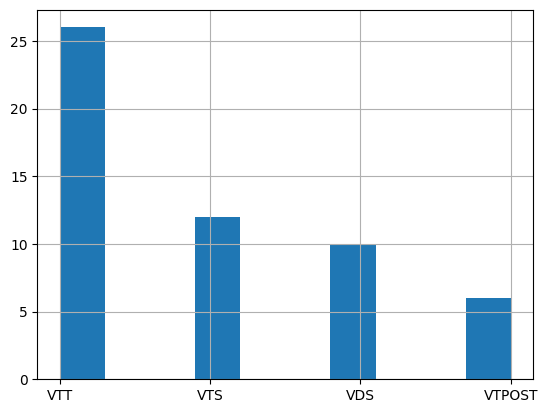

In [12]:
processed_df['TỔNG CÔNG TY'].hist()

In [13]:
new_df = pd.read_csv('/content/tmp.csv', index_col=False)

In [14]:
new_df

,CHỈ TIÊU,ĐƠN VỊ,ĐIỀU KIỆN,TỔNG CÔNG TY,KPI MẸ
0,KHCN Di động Vip,%,>=,VTT,Tỷ lệ kết nối thành công đến tổng đài
1,KHCN Di động đại trà,%,>=,VTT,Tỷ lệ kết nối thành công đến tổng đài
2,KHCN Cố định,%,>=,VTT,Tỷ lệ kết nối thành công đến tổng đài
3,KHDN SME,%,>=,VTT,Tỷ lệ kết nối thành công đến tổng đài
4,Phản ánh về CLM vô tuyến - Phản ánh về chất lư...,PA/1TTB/ngày,<=,VTT,Tỷ lệ phản ánh
5,Phản ánh về CLM vô tuyến - Phản ánh về tốc độ ...,PA/1TTB/ngày,<=,VTT,Tỷ lệ phản ánh
6,Phản ánh về lỗi dịch vụ cố định - Phản ánh về ...,PA/10K TB/ngày,<=,VTT,Tỷ lệ phản ánh
7,Phản ánh về lỗi dịch vụ cố định - Phản ánh về ...,PA/10K TB/ngày,<=,VTT,Tỷ lệ phản ánh
8,Phản ánh về SME - Dịch vụ CA,PA/10K KH/ ngày,<=,VTT,Tỷ lệ phản ánh
9,Phản ánh về SME - Dịch vụ BHXH,PA/10K KH/ ngày,<=,VTT,Tỷ lệ phản ánh


In [152]:
import random

def generate_kpi(condition,random_range,evaluation,kpi):
    if pd.isna(condition):
       report = random.uniform(*random_range)
    else:
       if condition == '>=':
          if evaluation == 'Đạt':
              report = random.uniform(kpi, random_range[1] + 0.1)
          else:
              report = random.uniform(random_range[0] - 0.1, kpi - 0.1)
       elif condition == '<=':
          if evaluation == 'Đạt':
              report = random.uniform(random_range[0] - 0.1, kpi)
          else:
              report = random.uniform(kpi + 0.1, random_range[1] + 0.1)
       else:
          print(f"Not support condition: {condition}")
          return None
    report = round(report, 1)
    return report

def generate_evaluation():
    # generate report: 70% không đạt, 30% đạt
    if random.random() < 0.7: # không đạt
        evaluation = 'Không đạt'
    else:
        evaluation = 'Đạt'
    return evaluation

def generate_samples(timeNow='01/2020', demo=False):
    samples = {"VTT" : {},
             "VTS" : {},
             "VDS" : {},
             "VTPOST" : {}}
    samples_quarter = {"VTT" : {},
             "VTS" : {},
             "VDS" : {},
             "VTPOST" : {}}
    samples_year = {"VTT" : {},
             "VTS" : {},
             "VDS" : {},
             "VTPOST" : {}}
    if demo == False:
      n_samples = len(new_df)
    else:
      n_samples = 10
    for i in range(n_samples):
        # idx = random.randint(0, len(new_df) - 1)
        template = new_df.iloc[i]

        # handle column name first
        target_column = 'CHỈ TIÊU'
        condition_column = 'ĐIỀU KIỆN'
        unit_column = 'ĐƠN VỊ'
        company_column = 'TỔNG CÔNG TY'
        group_column = 'KPI MẸ'

        current_month = int(timeNow.split('/')[0])
        current_year = int(timeNow.split('/')[1])

        current_quarter = ''
        for i in range(0,4):
            if current_month in [1 + 3*i,2 + 3*i,3 + 3*i]:
                current_quarter = i+1

        evaluation_column_name = f"Đánh giá"

        kpi_column_name = f"KPI mục tiêu tháng"
        report_value_column_name = f"Tháng {current_month}.{current_year}"
        kpi_column_name_quarter = f"KPI mục tiêu quý"
        report_value_column_name_quarter = f"Quý {current_quarter}.{current_year}"
        kpi_column_name_year = f"KPI mục tiêu năm"
        report_value_column_name_year = f"Năm {current_quarter}.{current_year}"

        # previous month and same month last year
        if current_month == 1:
            previous_month = 12
        else:
            previous_month = current_month - 1

        previous_quarter, previous_year = get_previous_quarter(f'Q{current_quarter}/{current_year}',choice=2)

        last_month_kpi_column_name = f"T{previous_month}.{previous_year}"
        last_year_kpi_column_name = f"T{current_month}.{current_year - 1}"

        last_month_kpi_column_name_quarter = f"Q{previous_quarter}.{previous_year}"
        last_year_kpi_column_name_quarter = f"Q{current_quarter}.{current_year - 1}"

        last_year_kpi_column_name_year = f"N{current_year - 1}"

        comparison_last_month_column_name = f"So sánh {last_month_kpi_column_name} Tăng giảm"
        comparison_last_year_column_name = f"So sánh {last_year_kpi_column_name} Tăng giảm"

        comparison_last_month_column_name_quarter = f"So sánh {last_month_kpi_column_name_quarter} Tăng giảm"
        comparison_last_year_column_name_quarter = f"So sánh {last_year_kpi_column_name_quarter} Tăng giảm"

        comparison_last_year_column_name_year = f"So sánh {last_year_kpi_column_name_year} Tăng giảm"

        # get target, condition, unit from template
        target = template[target_column]
        condition = template[condition_column]
        unit = template[unit_column]
        company = template[company_column]
        group = template[group_column]

        # generate kpi
        if pd.isna(condition):
            if unit == "%":
                random_range = (0, 100)
            else:
                random_range = (100, 1000)
        else:
            # case condition >=
            if condition == '>=':
                random_range = (80, 100)
            elif condition == '<=':
                if "phản ánh" in target.lower() or "phản ánh" in group.lower():
                    random_range = (0, 15)
                elif "thời gian trung bình" in target.lower() or "thời gian trung bình" in group.lower():
                    if unit == "Giây":
                       random_range = (90, 180)
                    else:
                       random_range = (0,28)
                else:
                    random_range = (0, 100)
            else:
                print(f"Not support condition: {condition}")
                continue

        # print(f"Random range: {random_range}")
        kpi = round(random.uniform(*random_range), 1)
        kpi_quarter = kpi
        if random.random() > 0.7:
            kpi_quarter = kpi + 0.1
        kpi_quarter = round(kpi_quarter,1)

        kpi_year = kpi_quarter
        if random.random() > 0.7:
            kpi_year = kpi_quarter + 0.1

        kpi_year = round(kpi_year,1)

        evaluation = generate_evaluation()
        report = generate_kpi(condition,random_range,evaluation,kpi)
        if report is None: continue

        evaluation_quarter = generate_evaluation()
        report_quarter = generate_kpi(condition,random_range,evaluation_quarter,kpi_quarter)
        if report_quarter is None: continue

        evaluation_year = generate_evaluation()
        report_year = generate_kpi(condition,random_range,evaluation_year,kpi_year)
        if report_year is None: continue

        last_month_kpi = round(random.uniform(*random_range), 1)
        last_year_kpi = round(random.uniform(*random_range), 1)
        last_month_kpi_quarter = round(random.uniform(*random_range), 1)
        last_year_kpi_quarter = round(random.uniform(*random_range), 1)
        last_year_kpi_year = round(random.uniform(*random_range), 1)

        if unit == "%":
            # any value > 100% will be 99.9%
            report = min(report, 99.9)
            report_quarter = min(report_quarter,99.9)
            report_year = min(report_year,99.9)

            last_month_kpi = min(last_month_kpi, 99.9)
            last_year_kpi = min(last_year_kpi, 99.9)

            last_month_kpi_quarter = min(last_month_kpi_quarter,99.9)
            last_year_kpi_quarter = min(last_year_kpi_quarter,99.9)

            last_year_kpi_year = min(last_year_kpi_year,99.9)

        comparison_last_month_kpi = round(report - last_month_kpi, 1)
        comparison_last_year_kpi = round(report - last_year_kpi, 1)

        comparison_last_month_kpi_quarter = round(report_quarter - last_month_kpi_quarter, 1)
        comparison_last_year_kpi_quarter = round(report_quarter - last_year_kpi_quarter, 1)

        comparison_last_year_kpi_year = round(report_year - last_year_kpi_year, 1)

        samples[company][target] = {
            "View" : "Tháng",
            "Time" : timeNow,
            target_column: target,
            unit_column: unit,
            condition_column: condition,
            kpi_column_name: kpi,
            report_value_column_name: report,
            evaluation_column_name: evaluation,
            last_month_kpi_column_name: last_month_kpi,
            comparison_last_month_column_name: comparison_last_month_kpi,
            last_year_kpi_column_name: last_year_kpi,
            comparison_last_year_column_name: comparison_last_year_kpi,
            company_column : company,
            group_column : group
        }

        samples_quarter[company][target] = {
            "View" : "Quý",
            "Time" : timeNow,
            target_column: target,
            unit_column: unit,
            condition_column: condition,
            kpi_column_name_quarter: kpi_quarter,
            report_value_column_name_quarter: report_quarter,
            evaluation_column_name: evaluation_quarter,
            last_month_kpi_column_name_quarter: last_month_kpi_quarter,
            comparison_last_month_column_name_quarter: comparison_last_month_kpi_quarter,
            last_year_kpi_column_name_quarter: last_year_kpi_quarter,
            comparison_last_year_column_name_quarter: comparison_last_year_kpi_quarter,
            company_column : company,
            group_column : group
        }

        samples_year[company][target] = {
            "View" : "Năm",
            "Time" : timeNow,
            target_column: target,
            unit_column: unit,
            condition_column: condition,
            kpi_column_name_year: kpi_year,
            report_value_column_name_year: report_year,
            evaluation_column_name: evaluation_year,
            last_year_kpi_column_name_year: last_year_kpi_year,
            comparison_last_year_column_name_year: comparison_last_year_kpi_year,
            company_column : company,
            group_column : group
        }

        if demo:
            # print("=============View Month==============")
            # print(f"{target_column}: {target}")
            # print(f"{unit_column}: {unit}")
            # print(f"{condition_column}: {condition}")
            # print(f"{kpi_column_name}: {kpi}")
            # print(f"{report_value_column_name}: {report}")
            # print(f"{evaluation_column_name}: {evaluation}")
            # print(f"{last_month_kpi_column_name}: {last_month_kpi}")
            # print(f"{comparison_last_month_column_name}: {comparison_last_month_kpi}")
            # print(f"{last_year_kpi_column_name}: {last_year_kpi}")
            # print(f"{comparison_last_year_column_name}: {comparison_last_year_kpi}")
            # print("=====================================")

            # print("=============View Quarter=============")
            # print(f"{target_column}: {target}")
            # print(f"{unit_column}: {unit}")
            # print(f"{condition_column}: {condition}")
            # print(f"{kpi_column_name_quarter}: {kpi_quarter}")
            # print(f"{report_value_column_name_quarter}: {report_quarter}")
            # print(f"{evaluation_column_name}: {evaluation_quarter}")
            # print(f"{last_month_kpi_column_name_quarter}: {last_month_kpi_quarter}")
            # print(f"{comparison_last_month_column_name_quarter}: {comparison_last_month_kpi_quarter}")
            # print(f"{last_year_kpi_column_name_quarter}: {last_year_kpi_quarter}")
            # print(f"{comparison_last_year_column_name_quarter}: {comparison_last_year_kpi_quarter}")
            # print("=====================================")

            # print("==============View Year==============")
            # print(f"{target_column}: {target}")
            # print(f"{unit_column}: {unit}")
            # print(f"{condition_column}: {condition}")
            # print(f"{kpi_column_name_year}: {kpi_year}")
            # print(f"{report_value_column_name_year}: {report_year}")
            # print(f"{evaluation_column_name}: {evaluation_year}")
            # print(f"{last_year_kpi_column_name_year}: {last_year_kpi_year}")
            # print(f"{comparison_last_year_column_name_year}: {comparison_last_year_kpi_year}")
            # print("=====================================")

            # print("=================INFO================")
            # print(f"{company_column} : {company}")
            # print(f"{group_column} : {group}")
            # print("=====================================")
            break
    return samples, samples_quarter, samples_year

month_dict, quarter_dict, year_dict = generate_samples(demo=False)

In [155]:
month_dict['VTT']['KHCN Di động Vip']

{'View': 'Tháng',
 'Time': '01/2020',
 'CHỈ TIÊU': 'KHCN Di động Vip',
 'ĐƠN VỊ': '%',
 'ĐIỀU KIỆN': '>=',
 'KPI mục tiêu tháng': 81.2,
 'Tháng 1.2020': 80.8,
 'Đánh giá': 'Không đạt',
 'T12.2019': 92.1,
 'So sánh T12.2019 Tăng giảm': -11.3,
 'T1.2019': 95.4,
 'So sánh T1.2019 Tăng giảm': -14.6,
 'TỔNG CÔNG TY': 'VTT',
 'KPI MẸ': 'Tỷ lệ kết nối thành công đến tổng đài'}

In [156]:
quarter_dict['VTT']['KHCN Di động Vip']

{'View': 'Quý',
 'Time': '01/2020',
 'CHỈ TIÊU': 'KHCN Di động Vip',
 'ĐƠN VỊ': '%',
 'ĐIỀU KIỆN': '>=',
 'KPI mục tiêu quý': 81.3,
 'Quý 1.2020': 80.6,
 'Đánh giá': 'Không đạt',
 'Q4.2019': 88.0,
 'So sánh Q4.2019 Tăng giảm': -7.4,
 'Q1.2019': 95.0,
 'So sánh Q1.2019 Tăng giảm': -14.4,
 'TỔNG CÔNG TY': 'VTT',
 'KPI MẸ': 'Tỷ lệ kết nối thành công đến tổng đài'}

In [157]:
year_dict['VTT']['KHCN Di động Vip']

{'View': 'Năm',
 'Time': '01/2020',
 'CHỈ TIÊU': 'KHCN Di động Vip',
 'ĐƠN VỊ': '%',
 'ĐIỀU KIỆN': '>=',
 'KPI mục tiêu năm': 81.4,
 'Năm 1.2020': 81.2,
 'Đánh giá': 'Không đạt',
 'N2019': 97.0,
 'So sánh N2019 Tăng giảm': -15.8,
 'TỔNG CÔNG TY': 'VTT',
 'KPI MẸ': 'Tỷ lệ kết nối thành công đến tổng đài'}

In [120]:
import calendar
from datetime import datetime
from datetime import datetime, timedelta

def next_month(date_str):
    date = datetime.strptime(date_str, '%m/%Y').date()
    year = date.year
    month = date.month
    days_in_month = calendar.monthrange(year, month)[1]
    if date.month == 12:
        next_date = date.replace(year=year+1, month=1)
    else:
        next_date = date.replace(day=1, month=month+1)
    next_date = next_date.replace(day=min(date.day, days_in_month))
    return datetime.strftime(next_date, '%m/%Y')


def prev_month(date_str):
    date = datetime.strptime(date_str, '%m/%Y')
    prev_date = date - timedelta(days=1)
    prev_month = prev_date.replace(day=1)
    return datetime.strftime(prev_month, '%m/%Y')

In [125]:
next_month('12/2021')

'01/2022'

In [22]:
dict_data = {
    "01/2020" : {
        "month" : month_dict,
        "quarter" : quarter_dict,
        "year" : year_dict
    }
}

In [23]:
def generate_random_range(condition,unit,target,group):
    if pd.isna(condition):
        if unit == "%":
            random_range = (0, 100)
        else:
            random_range = (100, 1000)
    else:
        # case condition >=
        if condition == '>=':
            random_range = (80, 100)
        elif condition == '<=':
            if "phản ánh" in target.lower() or "phản ánh" in group.lower():
                random_range = (0, 15)
            elif "thời gian trung bình" in target.lower() or "thời gian trung bình" in group.lower():
                if unit == "Giây":
                    random_range = (90, 180)
                else:
                    random_range = (0,28)
            else:
                random_range = (0, 100)
    return random_range

generate_random_range('>=','Phản ánh','tỉ lệ phản ánh khách hàng','tỉ lệ')

(80, 100)

In [44]:
def generate_view_quarter(current_month):
    current_quarter = ''
    for i in range(0,4):
        if current_month in [1 + 3*i,2 + 3*i,3 + 3*i]:
            current_quarter = i+1
    return current_quarter

def get_previous_quarter(current_quarter,choice=0):
    quarter,year = current_quarter.split('/')
    year = int(year)
    quarter = int(quarter[1])

    if quarter == 1:
        year -= 1
        quarter = 4
    else:
        quarter -= 1
    if choice == 0:
       return f'Q{quarter}/{year}'
    elif choice == 1:
       return f'Quý {quarter}.{year}'
    return quarter,year

In [33]:
get_previous_quarter('Q1/2020',0)

'Q4/2019'

In [110]:
dict_data.keys()

dict_keys(['01/2020'])

In [186]:
quarter_flag = 2
year_flag = 11
key = '01/2020'

dict_data = {
    "01/2020" : {
        "month" : month_dict,
        "quarter" : quarter_dict,
        "year" : year_dict
    }
}

index_loop = 1
while key != '06/2023':
  print(f"phase {index_loop}")
  index_loop += 1
  dict_key = dict_data[key]
  next_month_data = next_month(key)
  print(next_month_data)
  samples = { "VTT" : {},
              "VTS" : {},
              "VDS" : {},
              "VTPOST" : {}}
  samples_quarter = { "VTT" : {},
                      "VTS" : {},
                      "VDS" : {},
                      "VTPOST" : {}}
  samples_year = { "VTT" : {},
                   "VTS" : {},
                   "VDS" : {},
                   "VTPOST" : {}}

  for company_ in dict_key["month"].keys():
    for name in dict_key["month"][company_]:
      #fix value
      ele_month = dict_key["month"][company_][name]
      ele_quarter = dict_key["quarter"][company_][name]
      ele_year = dict_key["year"][company_][name]

      view = ele_month["View"]
      target = ele_month["CHỈ TIÊU"]
      condition = ele_month["ĐIỀU KIỆN"]
      company = ele_month['TỔNG CÔNG TY']
      group = ele_month['KPI MẸ']
      unit = ele_month['ĐƠN VỊ']

      #==============create new field===================
      timeNow = next_month(key)

      current_month = int(timeNow.split('/')[0])
      current_year = int(timeNow.split('/')[1])

      current_quarter = generate_view_quarter(current_month)

      evaluation_column_name = f"Đánh giá"

      kpi_column_name = f"KPI mục tiêu tháng"
      report_value_column_name = f"Tháng {current_month}.{current_year}"
      kpi_column_name_quarter = f"KPI mục tiêu quý"
      report_value_column_name_quarter = f"Quý {current_quarter}.{current_year}"
      kpi_column_name_year = f"KPI mục tiêu năm"
      report_value_column_name_year = f"Năm {current_quarter}.{current_year}"
      if current_month == 1:
          previous_month = 12
          quarter_year = current_year - 1
      else:
          previous_month = current_month - 1
          quarter_year = current_year

      previous_quarter, previous_year = get_previous_quarter(f'Q{current_quarter}/{current_year}',choice=2)

      if previous_month != 12:
        last_month_kpi_column_name = f"T{previous_month}.{current_year}"
      else:
        last_month_kpi_column_name = f"T{previous_month}.{current_year-1}"
      last_year_kpi_column_name = f"T{current_month}.{current_year - 1}"

      last_month_kpi_column_name_quarter = f"Q{previous_quarter}.{previous_year}"
      last_year_kpi_column_name_quarter = f"Q{current_quarter}.{current_year - 1}"

      last_year_kpi_column_name_year = f"N{current_year - 1}"

      comparison_last_month_column_name = f"So sánh {last_month_kpi_column_name} Tăng giảm"
      comparison_last_year_column_name = f"So sánh {last_year_kpi_column_name} Tăng giảm"

      comparison_last_month_column_name_quarter = f"So sánh {last_month_kpi_column_name_quarter} Tăng giảm"
      comparison_last_year_column_name_quarter = f"So sánh {last_year_kpi_column_name_quarter} Tăng giảm"

      comparison_last_year_column_name_year = f"So sánh {last_year_kpi_column_name_year} Tăng giảm"
      #==============create new field===================

      #==================month==================
      random_range = generate_random_range(condition,unit,target,group)

      kpi = round(random.uniform(*random_range), 1)
      evaluation = generate_evaluation()
      report = generate_kpi(condition,random_range,evaluation,kpi)
      # if report is None: continue

      last_month = int(key.split('/')[0])
      last_year = int(key.split('/')[1]) - 1
      last_month_kpi = ele_month[f'Tháng {last_month}.{last_year + 1}']

      if f"0{current_month}/{current_year - 1}" not in dict_data.keys() and f"{current_month}/{current_year - 1}" not in dict_data.keys():
        last_year_kpi = round(random.uniform(*random_range), 1)
      else:
        if f"0{current_month}/{current_year - 1}" in dict_data.keys(): timePrev = f"0{current_month}/{current_year -1}"
        else: timePrev = f"{current_month}/{current_year - 1}"
        last_year_kpi = dict_data[timePrev]["month"][company_][target][f"Tháng {current_month}.{current_year -1 }"]

      comparison_last_month_kpi = round(report - last_month_kpi, 1)
      comparison_last_year_kpi = round(report - last_year_kpi, 1)

      samples[company_][target] = {
              "View" : "Tháng",
              "Time" : timeNow,
              "CHỈ TIÊU" : target,
              "ĐƠN VỊ" : unit,
              "ĐIỀU KIỆN": condition,
              kpi_column_name: kpi,
              report_value_column_name: report,
              evaluation_column_name: evaluation,
              last_month_kpi_column_name: last_month_kpi,
              comparison_last_month_column_name: comparison_last_month_kpi,
              last_year_kpi_column_name: last_year_kpi,
              comparison_last_year_column_name: comparison_last_year_kpi,
              "TỔNG CÔNG TY" : company,
              "KPI MẸ" : group
          }
      #==================month==================

      #==================quarter==================
      if quarter_flag != 0:
        kpi_quarter = ele_quarter['KPI mục tiêu quý']
      else:
        kpi_quarter = kpi
        if random.random() > 0.7:
            kpi_quarter = kpi + 0.1
        kpi_quarter = round(kpi_quarter,1)
      evaluation_quarter = generate_evaluation()
      report_quarter = generate_kpi(condition,random_range,evaluation_quarter,kpi_quarter)
      # if report_quarter is None: continue
      if f'Q{previous_quarter}.{previous_year}' in ele_quarter.keys():
        last_month_kpi_quarter = ele_quarter[f'Q{previous_quarter}.{previous_year}']
      else:
        if f"0{previous_month}/{quarter_year}" not in dict_data.keys() and f"{previous_month}/{quarter_year}" not in dict_data.keys():
          last_month_kpi_quarter = round(random.uniform(*random_range), 1)
        else:
          if f"0{previous_month}/{quarter_year}" in dict_data.keys(): timePrev = f"0{previous_month}/{quarter_year}"
          else: timePrev = f"{previous_month}/{previous_year}"
          last_month_kpi_quarter = dict_data[timePrev]["quarter"][company_][target][f"Quý {previous_quarter}.{quarter_year}"]

      if f'Q{current_quarter}.{current_year - 1}' in ele_quarter.keys():
        last_year_kpi_quarter = ele_quarter[f'Q{current_quarter}.{current_year - 1}']
      else:
        if f"0{current_month}/{current_year - 1}" not in dict_data.keys() and f"{current_month}/{current_year - 1}" not in dict_data.keys():
            last_year_kpi_quarter = round(random.uniform(*random_range), 1)
        else:
          if f"0{current_month}/{current_year - 1}" in dict_data.keys(): timePrev = f"0{current_month}/{current_year - 1}"
          else: timePrev = f"{current_month}/{current_year - 1}"
          last_year_kpi_quarter = dict_data[timePrev]["quarter"][company_][target][f"Quý {current_quarter}.{current_year - 1}"]


      comparison_last_month_kpi_quarter = round(report_quarter - last_month_kpi_quarter, 1)
      comparison_last_year_kpi_quarter = round(report_quarter - last_year_kpi_quarter, 1)

      samples_quarter[company_][target] = {
              "View" : "Quý",
              "Time" : timeNow,
              "CHỈ TIÊU": target,
              "ĐƠN VỊ": unit,
              "ĐIỀU KIỆN": condition,
              kpi_column_name_quarter: kpi_quarter,
              report_value_column_name_quarter: report_quarter,
              evaluation_column_name: evaluation_quarter,
              last_month_kpi_column_name_quarter: last_month_kpi_quarter,
              comparison_last_month_column_name_quarter: comparison_last_month_kpi_quarter,
              last_year_kpi_column_name_quarter: last_year_kpi_quarter,
              comparison_last_year_column_name_quarter: comparison_last_year_kpi_quarter,
              "TỔNG CÔNG TY" : company,
              "KPI MẸ" : group
          }
      #==================quarter==================

      #==================year==================
      if year_flag != 0:
        kpi_year = ele_year['KPI mục tiêu năm']
      else:
        kpi_year = kpi_quarter
        if random.random() > 0.7:
            kpi_year = kpi_quarter + 0.1
        kpi_year = round(kpi_year,1)
      evaluation_year = generate_evaluation()
      report_year = generate_kpi(condition,random_range,evaluation_year,kpi_year)

      if f'N{current_year - 1}' in ele_year.keys():
        last_year_kpi_year = ele_year[f'N{current_year - 1}']
      else:
        if f"0{current_month}/{current_year - 1}" not in dict_data.keys() and f"{current_month}/{current_year - 1}" not in dict_data.keys():
            last_year_kpi_year = round(random.uniform(*random_range), 1)
        else:
          if f"0{current_month}/{current_year - 1}" in dict_data.keys(): timePrev = f"0{current_month}/{current_year - 1}"
          else: timePrev = f"{current_month}/{current_year - 1}"
          last_year_kpi_year = dict_data[timePrev]["year"][company_][target][f"Năm {current_quarter}.{current_year - 1}"]

      comparison_last_year_kpi_year = round(report_year - last_year_kpi_year, 1)
      samples_year[company_][target] = {
          "View" : "Năm",
          "Time" : timeNow,
          "CHỈ TIÊU": target,
          "ĐƠN VỊ": unit,
          "ĐIỀU KIỆN": condition,
          kpi_column_name_year: kpi_year,
          report_value_column_name_year: report_year,
          evaluation_column_name: evaluation_year,
          last_year_kpi_column_name_year: last_year_kpi_year,
          comparison_last_year_column_name_year: comparison_last_year_kpi_year,
          "TỔNG CÔNG TY" : company,
          "KPI MẸ" : group
        }
      #==================year==================
  if quarter_flag != 0:
    quarter_flag -= 1
  else: quarter_flag = 2
  if year_flag != 0:
    year_flag -= 1
  else: quarter_flag = 11
  dict_data[next_month_data] = {
      "month" : samples,
      "quarter" : samples_quarter,
      "year" : samples_year
  }
  key = next_month_data

phase 1
02/2020
phase 2
03/2020
phase 3
04/2020
phase 4
05/2020
phase 5
06/2020
phase 6
07/2020
phase 7
08/2020
phase 8
09/2020
phase 9
10/2020
phase 10
11/2020
phase 11
12/2020
phase 12
01/2021
phase 13
02/2021
phase 14
03/2021
phase 15
04/2021
phase 16
05/2021
phase 17
06/2021
phase 18
07/2021
phase 19
08/2021
phase 20
09/2021
phase 21
10/2021
phase 22
11/2021
phase 23
12/2021
phase 24
01/2022
phase 25
02/2022
phase 26
03/2022
phase 27
04/2022
phase 28
05/2022
phase 29
06/2022
phase 30
07/2022
phase 31
08/2022
phase 32
09/2022
phase 33
10/2022
phase 34
11/2022
phase 35
12/2022
phase 36
01/2023
phase 37
02/2023
phase 38
03/2023
phase 39
04/2023
phase 40
05/2023
phase 41
06/2023


In [194]:
dict_data['03/2022']['quarter']['VTT']['KHCN Di động Vip']

{'View': 'Quý',
 'Time': '03/2022',
 'CHỈ TIÊU': 'KHCN Di động Vip',
 'ĐƠN VỊ': '%',
 'ĐIỀU KIỆN': '>=',
 'KPI mục tiêu quý': 87.3,
 'Quý 1.2022': 86.5,
 'Đánh giá': 'Không đạt',
 'Q4.2021': 82.5,
 'So sánh Q4.2021 Tăng giảm': 4.0,
 'Q1.2021': 86.6,
 'So sánh Q1.2021 Tăng giảm': -0.1,
 'TỔNG CÔNG TY': 'VTT',
 'KPI MẸ': 'Tỷ lệ kết nối thành công đến tổng đài'}

In [193]:
dict_data['04/2022']['quarter']['VTT']['KHCN Di động Vip']

{'View': 'Quý',
 'Time': '04/2022',
 'CHỈ TIÊU': 'KHCN Di động Vip',
 'ĐƠN VỊ': '%',
 'ĐIỀU KIỆN': '>=',
 'KPI mục tiêu quý': 87.3,
 'Quý 2.2022': 89.9,
 'Đánh giá': 'Đạt',
 'Q1.2022': 86.5,
 'So sánh Q1.2022 Tăng giảm': 3.4,
 'Q2.2021': 83.6,
 'So sánh Q2.2021 Tăng giảm': 6.3,
 'TỔNG CÔNG TY': 'VTT',
 'KPI MẸ': 'Tỷ lệ kết nối thành công đến tổng đài'}

In [195]:
print(dict_data.keys())
print(dict_data['01/2020'].keys())
print(dict_data['01/2020']['month'].keys())
print(dict_data['01/2020']['month']['VTT'].keys())

dict_keys(['01/2020', '02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020', '01/2021', '02/2021', '03/2021', '04/2021', '05/2021', '06/2021', '07/2021', '08/2021', '09/2021', '10/2021', '11/2021', '12/2021', '01/2022', '02/2022', '03/2022', '04/2022', '05/2022', '06/2022', '07/2022', '08/2022', '09/2022', '10/2022', '11/2022', '12/2022', '01/2023', '02/2023', '03/2023', '04/2023', '05/2023', '06/2023'])
dict_keys(['month', 'quarter', 'year'])
dict_keys(['VTT', 'VTS', 'VDS', 'VTPOST'])
dict_keys(['KHCN Di động Vip', 'KHCN Di động đại trà', 'KHCN Cố định', 'KHDN SME', 'Phản ánh về CLM vô tuyến - Phản ánh về chất lượng sóng và thoại', 'Phản ánh về CLM vô tuyến - Phản ánh về tốc độ truy cập Data', 'Phản ánh về lỗi dịch vụ cố định - Phản ánh về lỗi dịch vụ FTTH GPON', 'Phản ánh về lỗi dịch vụ cố định - Phản ánh về lỗi dịch vụ FTTH Truyền hình số', 'Phản ánh về SME - Dịch vụ CA', 'Phản ánh về SME - Dịch vụ BHXH', 'Phản ánh về

In [197]:
import pickle

with open('saved_dictionary.pkl', 'wb') as f:
    pickle.dump(dict_data, f)

with open('saved_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [199]:
print(loaded_dict.keys())
print(loaded_dict['01/2020'].keys())
print(loaded_dict['01/2020']['month'].keys())
print(loaded_dict['01/2020']['month']['VTT'].keys())

dict_keys(['01/2020', '02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020', '01/2021', '02/2021', '03/2021', '04/2021', '05/2021', '06/2021', '07/2021', '08/2021', '09/2021', '10/2021', '11/2021', '12/2021', '01/2022', '02/2022', '03/2022', '04/2022', '05/2022', '06/2022', '07/2022', '08/2022', '09/2022', '10/2022', '11/2022', '12/2022', '01/2023', '02/2023', '03/2023', '04/2023', '05/2023', '06/2023'])
dict_keys(['month', 'quarter', 'year'])
dict_keys(['VTT', 'VTS', 'VDS', 'VTPOST'])
dict_keys(['KHCN Di động Vip', 'KHCN Di động đại trà', 'KHCN Cố định', 'KHDN SME', 'Phản ánh về CLM vô tuyến - Phản ánh về chất lượng sóng và thoại', 'Phản ánh về CLM vô tuyến - Phản ánh về tốc độ truy cập Data', 'Phản ánh về lỗi dịch vụ cố định - Phản ánh về lỗi dịch vụ FTTH GPON', 'Phản ánh về lỗi dịch vụ cố định - Phản ánh về lỗi dịch vụ FTTH Truyền hình số', 'Phản ánh về SME - Dịch vụ CA', 'Phản ánh về SME - Dịch vụ BHXH', 'Phản ánh về